In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd /content/drive/My Drive/Likhit/SignBoarding

/content/drive/My Drive/Likhit/SignBoarding


In [3]:
#packages needed
import numpy as np
import cv2
import os

from keras_preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

from keras.layers import MaxPooling2D, Conv2D, Dropout, Flatten, Dense
from keras.models import Sequential
import pickle

# from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam 
# from keras.utils import to_categorical

In [4]:
# variables required
path = r'data/Train'
testRatio = 0.2
valRatio = 0.2
imageDimensions= (32,32,3)
batchSizeVal= 50
epochsVal = 10
stepsPerEpochVal = 2000

In [5]:
#### IMPORTING DATA/IMAGES FROM FOLDERS 
count = 0
images = []     # LIST CONTAINING ALL THE IMAGES 
classNo = []    # LIST CONTAINING ALL THE CORRESPONDING CLASS ID OF IMAGES 
myList = os.listdir(path)
print("Total Classes Detected:",len(myList))
noOfClasses = len(myList)
print("Importing Classes .......")
for x in range (0,noOfClasses):
    myPicList = os.listdir(path+"/"+str(x))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(x)+"/"+y)
        curImg = cv2.resize(curImg,(32,32))
        images.append(curImg)
        classNo.append(x)
    print(x,end= " ")
print(" ")
print("Total Images in Images List = ",len(images))
print("Total IDS in classNo List= ",len(classNo))

Total Classes Detected: 43
Importing Classes .......
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  
Total Images in Images List =  39210
Total IDS in classNo List=  39210


In [6]:
images = np.array(images)
classNo = np.array(classNo)
print(images.shape)

(39210, 32, 32, 3)


In [7]:
X_train,X_test,y_train,y_test = train_test_split(images,classNo,test_size=testRatio)
X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,test_size=valRatio)
print(X_train.shape)
print(X_test.shape)
print(X_validation.shape)


(25094, 32, 32, 3)
(7842, 32, 32, 3)
(6274, 32, 32, 3)


[139, 1390, 1435, 909, 1286, 1179, 273, 944, 921, 945, 1303, 851, 1322, 1374, 501, 391, 265, 691, 758, 150, 227, 213, 247, 324, 173, 914, 387, 155, 339, 172, 312, 511, 153, 440, 261, 797, 260, 140, 1341, 183, 228, 146, 144]


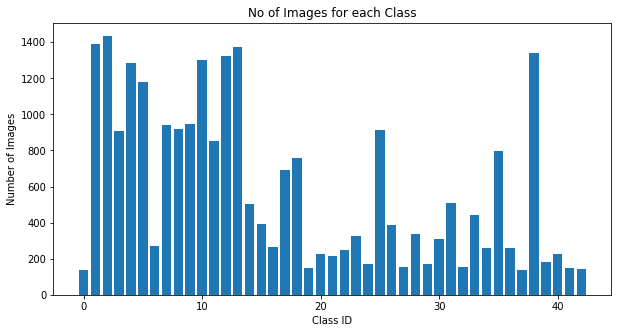

In [8]:
numOfSamples= []
for x in range(0,noOfClasses):
    #print(len(np.where(y_train==x)[0]))
    numOfSamples.append(len(np.where(y_train==x)[0]))
print(numOfSamples)

plt.figure(figsize=(10,5))
plt.bar(range(0,noOfClasses),numOfSamples)
plt.title("No of Images for each Class")
plt.xlabel("Class ID")
plt.ylabel("Number of Images")
plt.show()

In [9]:
def preProcessing(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img) # makes the lighting distributed equally
    img = img/255
    return img

In [10]:
X_train= np.array(list(map(preProcessing,X_train)))
X_test= np.array(list(map(preProcessing,X_test)))
X_validation= np.array(list(map(preProcessing,X_validation)))

In [11]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
X_validation = X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)


In [12]:
dataGen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)
dataGen.fit(X_train)

In [13]:
def myModel():
    noOfFilters = 60
    sizeOfFilter1 = (5,5)
    sizeOfFilter2 = (3, 3)
    sizeOfPool = (2,2)
    noOfNodes= 500

    model = Sequential()
    
    model.add((Conv2D(noOfFilters,sizeOfFilter1,input_shape=(imageDimensions[0],
                      imageDimensions[1],1),activation='relu')))
    model.add((Conv2D(noOfFilters, sizeOfFilter1, activation='relu')))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    
    model.add((Conv2D(noOfFilters//2, sizeOfFilter2, activation='relu')))
    model.add((Conv2D(noOfFilters//2, sizeOfFilter2, activation='relu')))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(noOfNodes,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(noOfClasses, activation='softmax'))
    
    #adam optmizer
    model.compile(Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model



In [15]:
model = myModel()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 60)        1560      
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 60)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                  

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit_generator(dataGen.flow(X_train, y_train, batch_size=64),
                              epochs=30, 
                              validation_data=(X_validation, y_validation),
                              shuffle=1)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


393/393 [==============================] - 14s 35ms/step - loss: 1.1847 - accuracy: 0.6374 - val_loss: 0.2790 - val_accuracy: 0.9359
Epoch 2/30
393/393 [==============================] - 13s 34ms/step - loss: 0.8132 - accuracy: 0.7498 - val_loss: 0.1863 - val_accuracy: 0.9554
Epoch 3/30
393/393 [==============================] - 13s 34ms/step - loss: 0.6346 - accuracy: 0.8038 - val_loss: 0.1350 - val_accuracy: 0.9659
Epoch 4/30
393/393 [==============================] - 13s 33ms/step - loss: 0.5352 - accuracy: 0.8335 - val_loss: 0.1064 - val_accuracy: 0.9686
Epoch 5/30
393/393 [==============================] - 13s 33ms/step - loss: 0.4438 - accuracy: 0.8627 - val_loss: 0.0768 - val_accuracy: 0.9783
Epoch 6/30
393/393 [==============================] - 13s 33ms/step - loss: 0.3956 - accuracy: 0.8766 - val_loss: 0.0630 - val_accuracy: 0.9857
Epoch 7/30
393/393 [==============================] - 13s 33ms/step - loss: 0.3584 - accuracy: 0.8897 - val_loss: 0.0543 - val_accuracy: 0.9850
Epo

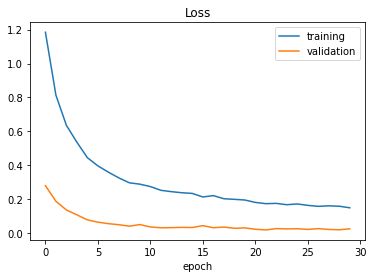

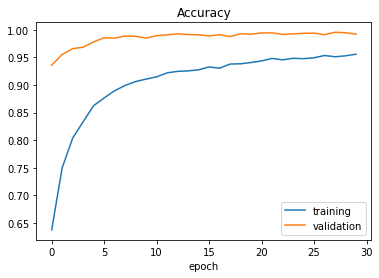

In [19]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()


In [20]:
score = model.evaluate(X_test,y_test,verbose=0)
print('Test Score = ',score[0])
print('Test Accuracy =', score[1])


Test Score =  0.019225865602493286
Test Accuracy = 0.9952818155288696


In [25]:
def preProcessing(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img / 255
    return img

In [33]:
labels = ['Speed limit (20km/h)',
                'Speed limit (30km/h)',
                'Speed limit (50km/h)',
                'Speed limit (60km/h)',
                'Speed limit (70km/h)',
                'Speed limit (80km/h)',
                'End of speed limit (80km/h)',
                'Speed limit (100km/h)',
                'Speed limit (120km/h)',
                'No passing',
                'No passing veh over 3.5 tons',
                'Right-of-way at intersection',
                'Priority road',
                'Yield',
                'Stop',
                'No vehicles',
                'Veh > 3.5 tons prohibited',
                'No entry',
                'General caution',
                'Dangerous curve left',
                'Dangerous curve right',
                'Double curve',
                'Bumpy road',
                'Slippery road',
                'Road narrows on the right',
                'Road work',
                'Traffic signals',
                'Pedestrians',
                'Children crossing',
                'Bicycles crossing',
                'Beware of ice/snow',
                'Wild animals crossing',
                'End speed + passing limits',
                'Turn right ahead',
                'Turn left ahead',
                'Ahead only',
                'Go straight or right',
                'Go straight or left',
                'Keep right',
                'Keep left',
                'Roundabout mandatory',
                'End of no passing',
                'End no passing veh > 3.5 tons']

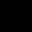

[22] 0.9998926


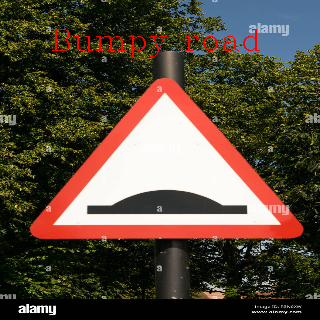

Bumpy road


In [40]:
from google.colab.patches import cv2_imshow
imgOriginal = cv2.imread('test3.jpg')
imgOriginal = cv2.resize(imgOriginal, (320, 320))
img = np.asarray(imgOriginal)
img = cv2.resize(img, (32, 32))
img = preProcessing(img)
cv2_imshow(img)
img = img.reshape(1, 32, 32, 1)
classIndex = np.argmax(model.predict(img),axis=1)
predictions = model.predict(img)
probVal = np.amax(predictions)
print(classIndex, probVal)
imgOriginal=cv2.putText(imgOriginal, labels[classIndex[0]],
                    (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 1)

cv2_imshow(imgOriginal)
cv2.waitKey(0) 
cv2.destroyAllWindows()
print(labels[classIndex[0]])

In [36]:
model.save(f"ClassificationModel.h5")

In [37]:
!ls

ClassificationModel.h5	left.aac   signsClassificationModel.h5
data			right.aac  test3.jpg
